# EEG Connectivity Methods

In [1]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
import seaborn as sns

In [ ]:
import mne
from mne.connectivity import spectral_connectivity
import seaborn as sns
from mne.viz import plot_connectivity_circle

In [4]:
import numpy as np
import os
import pandas as pd

In [4]:
epochs_files = os.listdir("../09_PreparationEEG/epochs_MovingWindowPeakToPeak/")

In [5]:
connecivity_methods =["coh", #Coherence real_part
                      #"cohy", #coherence complex number, contains both coh imcoh
                      "imcoh", # Imaginary coherence 
                      
                      "plv", # Phase-Locking Value'
                      "ppc", # Pairwise Phase Consistency 
                      "pli", # Phase Lag Index 
                      #"pli2_unbiased", # Unbiased estimator of squared PLI
                      "wpli",# : Weighted Phase Lag Index (WPLI)
                      #"wpli2_debiased", # : Debiased estimator of squared WPLI
                      
                     ]

In [16]:
mne.set_log_level('ERROR')

# read epochs

In [6]:
epochs = []
for i in range(len(epochs_files)):
    ep = mne.read_epochs("../09_PreparationEEG/epochs/"+epochs_files[i])
    ep =  ep.crop(tmin=0)
    ep = ep.drop_channels(ep.ch_names[28:])
    epochs.insert(i,ep)

Reading ../09_PreparationEEG/epochs/AAR23B1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
240 matching events found
Applying baseline correction (mode: mean)
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/ACE11B1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
238 matching events found
Applying baseline correction (mode: mean)
238 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/ADD25P1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
209 matching events found
Applying baseline correction (mode: mean)
209 matching events found
Applying 

Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/BRL04L1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
236 matching events found
Applying baseline correction (mode: mean)
236 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/BRS27B1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
235 matching events found
Applying baseline correction (mode: mean)
235 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/BSE11B1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
234 matchin

235 matching events found
Applying baseline correction (mode: mean)
235 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/IGN31N1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
240 matching events found
Applying baseline correction (mode: mean)
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/IJO20G1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
231 matching events found
Applying baseline correction (mode: mean)
231 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/IMA20B1-epo.fif ...
    Found the data of interest:
    

        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
240 matching events found
Applying baseline correction (mode: mean)
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/MLS07B1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
199 matching events found
Applying baseline correction (mode: mean)
199 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/MMN14M1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
238 matching events found
Applying baseline correction (mode: mean)
238 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Readi

Reading ../09_PreparationEEG/epochs/VGR24B1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
240 matching events found
Applying baseline correction (mode: mean)
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/VJM28H1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
240 matching events found
Applying baseline correction (mode: mean)
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading ../09_PreparationEEG/epochs/VJR20B1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
240 matching events found
Applying baseline correction (mode: mean)
240 matching events found
Applying 

# create features and drop them in dataframes

## create empty data frames

In [27]:
ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FCz', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2', 'TP9', 'TP10']

In [11]:
fmin, fmax = 4., 10.
sfreq = 250.0

In [12]:
dfs = []
colum_names = ["_".join([a,b]) for a in ch_names for b in ch_names]
for i in range(len(connecivity_methods)):
    dfs.insert(i,
              pd.DataFrame(
                  columns=["_".join([a,b]) for a in ep.ch_names for b in ep.ch_names] )
              )

## calculate features and save them as csv

In [13]:
for i in range(len(epochs_files)):
    print (i)
    ep = epochs[i]
    subjID = epochs_files[i].split("-")[0]
    
    for j in range(len(connecivity_methods)):
        cm = connecivity_methods[j]
        con, _, _, _, _ = spectral_connectivity(
            ep, method=cm, mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
            faverage=True,  mt_adaptive=False, n_jobs=-1)
        dfs[j].loc[subjID] = con.flatten()

0
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 378 connections
    using t=0.000s..0.800s for estimation (201 points)
    frequencies: 5.0Hz..10.0Hz (5 points)
    connectivity scores will be averaged for each band


<ipython-input-13-b77f115da602>:10: RuntimeWarning: fmin=4.000 Hz corresponds to 3.216 < 5 cycles based on the epoch length 0.804 sec, need at least 1.250 sec epochs or fmin=6.219. Spectrum estimate will be unreliable.
  faverage=True,  mt_adaptive=False, n_jobs=-1)


    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing connectivity for epochs 1..1


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


    computing connectivity for epochs 2..2


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


    computing connectivity for epochs 3..3


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


    computing connectivity for epochs 4..4


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


    computing connectivity for epochs 5..5


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


    computing connectivity for epochs 6..6


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


    computing connectivity for epochs 7..7


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


    computing connectivity for epochs 8..8


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


    computing connectivity for epochs 9..9
    computing connectivity for epochs 10..10
    computing connectivity for epochs 11..11
    computing connectivity for epochs 12..12
    computing connectivity for epochs 13..13
    computing connectivity for epochs 14..14
    computing connectivity for epochs 15..15
    computing connectivity for epochs 16..16
    computing connectivity for epochs 17..17
    computing connectivity for epochs 18..18
    computing connectivity for epochs 19..19
    computing connectivity for epochs 20..20
    computing connectivity for epochs 21..21
    computing connectivity for epochs 22..22
    computing connectivity for epochs 23..23
    computing connectivity for epochs 24..24
    computing connectivity for epochs 25..25


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concu

    computing connectivity for epochs 26..26
    computing connectivity for epochs 27..27
    computing connectivity for epochs 28..28
    computing connectivity for epochs 29..29
    computing connectivity for epochs 30..30
    computing connectivity for epochs 31..31
    computing connectivity for epochs 32..32
    computing connectivity for epochs 33..33
    computing connectivity for epochs 34..34
    computing connectivity for epochs 35..35
    computing connectivity for epochs 36..36
    computing connectivity for epochs 37..37
    computing connectivity for epochs 38..38
    computing connectivity for epochs 39..39
    computing connectivity for epochs 40..40
    computing connectivity for epochs 41..41
    computing connectivity for epochs 42..42
    computing connectivity for epochs 43..43
    computing connectivity for epochs 44..44
    computing connectivity for epochs 45..45


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 46..46
    computing connectivity for epochs 47..47
    computing connectivity for epochs 48..48
    computing connectivity for epochs 49..49
    computing connectivity for epochs 50..50
    computing connectivity for epochs 51..51
    computing connectivity for epochs 52..52
    computing connectivity for epochs 53..53
    computing connectivity for epochs 54..54
    computing connectivity for epochs 55..55
    computing connectivity for epochs 56..56
    computing connectivity for epochs 57..57
    computing connectivity for epochs 58..58
    computing connectivity for epochs 59..59
    computing connectivity for epochs 60..60
    computing connectivity for epochs 61..61
    computing connectivity for epochs 62..62
    computing connectivity for epochs 63..63
    computing connectivity for epochs 64..64


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 65..65
    computing connectivity for epochs 66..66
    computing connectivity for epochs 67..67
    computing connectivity for epochs 68..68
    computing connectivity for epochs 69..69
    computing connectivity for epochs 70..70
    computing connectivity for epochs 71..71
    computing connectivity for epochs 72..72
    computing connectivity for epochs 73..73
    computing connectivity for epochs 74..74
    computing connectivity for epochs 75..75
    computing connectivity for epochs 76..76
    computing connectivity for epochs 77..77
    computing connectivity for epochs 78..78
    computing connectivity for epochs 79..79
    computing connectivity for epochs 80..80
    computing connectivity for epochs 81..81
    computing connectivity for epochs 82..82
    computing connectivity for epochs 83..83


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 84..84
    computing connectivity for epochs 85..85
    computing connectivity for epochs 86..86
    computing connectivity for epochs 87..87
    computing connectivity for epochs 88..88
    computing connectivity for epochs 89..89
    computing connectivity for epochs 90..90
    computing connectivity for epochs 91..91
    computing connectivity for epochs 92..92
    computing connectivity for epochs 93..93
    computing connectivity for epochs 94..94
    computing connectivity for epochs 95..95
    computing connectivity for epochs 96..96
    computing connectivity for epochs 97..97
    computing connectivity for epochs 98..98
    computing connectivity for epochs 99..99
    computing connectivity for epochs 100..100
    computing connectivity for epochs 101..101
    computing connectivity for epochs 102..102


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 103..103
    computing connectivity for epochs 104..104
    computing connectivity for epochs 105..105
    computing connectivity for epochs 106..106
    computing connectivity for epochs 107..107
    computing connectivity for epochs 108..108
    computing connectivity for epochs 109..109
    computing connectivity for epochs 110..110
    computing connectivity for epochs 111..111
    computing connectivity for epochs 112..112
    computing connectivity for epochs 113..113
    computing connectivity for epochs 114..114
    computing connectivity for epochs 115..115
    computing connectivity for epochs 116..116
    computing connectivity for epochs 117..117
    computing connectivity for epochs 118..118
    computing connectivity for epochs 119..119
    computing connectivity for epochs 120..120
    computing connectivity for epochs 121..121


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 122..122
    computing connectivity for epochs 123..123
    computing connectivity for epochs 124..124
    computing connectivity for epochs 125..125
    computing connectivity for epochs 126..126
    computing connectivity for epochs 127..127
    computing connectivity for epochs 128..128
    computing connectivity for epochs 129..129
    computing connectivity for epochs 130..130
    computing connectivity for epochs 131..131
    computing connectivity for epochs 132..132
    computing connectivity for epochs 133..133
    computing connectivity for epochs 134..134
    computing connectivity for epochs 135..135
    computing connectivity for epochs 136..136
    computing connectivity for epochs 137..137
    computing connectivity for epochs 138..138
    computing connectivity for epochs 139..139
    computing connectivity for epochs 140..140
    computing connectivity for epochs 141..141


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 142..142
    computing connectivity for epochs 143..143
    computing connectivity for epochs 144..144
    computing connectivity for epochs 145..145
    computing connectivity for epochs 146..146
    computing connectivity for epochs 147..147
    computing connectivity for epochs 148..148
    computing connectivity for epochs 149..149
    computing connectivity for epochs 150..150
    computing connectivity for epochs 151..151
    computing connectivity for epochs 152..152
    computing connectivity for epochs 153..153
    computing connectivity for epochs 154..154
    computing connectivity for epochs 155..155
    computing connectivity for epochs 156..156
    computing connectivity for epochs 157..157
    computing connectivity for epochs 158..158
    computing connectivity for epochs 159..159


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 160..160
    computing connectivity for epochs 161..161
    computing connectivity for epochs 162..162
    computing connectivity for epochs 163..163
    computing connectivity for epochs 164..164
    computing connectivity for epochs 165..165
    computing connectivity for epochs 166..166
    computing connectivity for epochs 167..167
    computing connectivity for epochs 168..168
    computing connectivity for epochs 169..169
    computing connectivity for epochs 170..170
    computing connectivity for epochs 171..171
    computing connectivity for epochs 172..172
    computing connectivity for epochs 173..173
    computing connectivity for epochs 174..174
    computing connectivity for epochs 175..175
    computing connectivity for epochs 176..176
    computing connectivity for epochs 177..177
    computing connectivity for epochs 178..178


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 179..179
    computing connectivity for epochs 180..180
    computing connectivity for epochs 181..181
    computing connectivity for epochs 182..182
    computing connectivity for epochs 183..183
    computing connectivity for epochs 184..184
    computing connectivity for epochs 185..185
    computing connectivity for epochs 186..186
    computing connectivity for epochs 187..187
    computing connectivity for epochs 188..188
    computing connectivity for epochs 189..189
    computing connectivity for epochs 190..190
    computing connectivity for epochs 191..191
    computing connectivity for epochs 192..192
    computing connectivity for epochs 193..193
    computing connectivity for epochs 194..194
    computing connectivity for epochs 195..195
    computing connectivity for epochs 196..196
    computing connectivity for epochs 197..197


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concu

    computing connectivity for epochs 198..198
    computing connectivity for epochs 199..199
    computing connectivity for epochs 200..200
    computing connectivity for epochs 201..201
    computing connectivity for epochs 202..202
    computing connectivity for epochs 203..203
    computing connectivity for epochs 204..204
    computing connectivity for epochs 205..205
    computing connectivity for epochs 206..206
    computing connectivity for epochs 207..207
    computing connectivity for epochs 208..208
    computing connectivity for epochs 209..209
    computing connectivity for epochs 210..210
    computing connectivity for epochs 211..211
    computing connectivity for epochs 212..212
    computing connectivity for epochs 213..213
    computing connectivity for epochs 214..214
    computing connectivity for epochs 215..215
    computing connectivity for epochs 216..216
    computing connectivity for epochs 217..217


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 218..218
    computing connectivity for epochs 219..219
    computing connectivity for epochs 220..220
    computing connectivity for epochs 221..221
    computing connectivity for epochs 222..222
    computing connectivity for epochs 223..223
    computing connectivity for epochs 224..224
    computing connectivity for epochs 225..225
    computing connectivity for epochs 226..226
    computing connectivity for epochs 227..227
    computing connectivity for epochs 228..228
    computing connectivity for epochs 229..229
    computing connectivity for epochs 230..230
    computing connectivity for epochs 231..231
    computing connectivity for epochs 232..232
    computing connectivity for epochs 233..233


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 234..234
    computing connectivity for epochs 235..235
    computing connectivity for epochs 236..236
    computing connectivity for epochs 237..237
    computing connectivity for epochs 238..238
    computing connectivity for epochs 239..239
    computing connectivity for epochs 240..240
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 378 connections
    using t=0.000s..0.800s for estimation (201 points)
    frequencies: 5.0Hz..10.0Hz (5 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing connectivity for epochs 1..1
    computing connectivity for epochs 2..2
    computing connectivity for epochs 3..3
    computing connectivi

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 9..9
    computing connectivity for epochs 10..10
    computing connectivity for epochs 11..11
    computing connectivity for epochs 12..12
    computing connectivity for epochs 13..13
    computing connectivity for epochs 14..14
    computing connectivity for epochs 15..15
    computing connectivity for epochs 16..16
    computing connectivity for epochs 17..17
    computing connectivity for epochs 18..18
    computing connectivity for epochs 19..19
    computing connectivity for epochs 20..20
    computing connectivity for epochs 21..21
    computing connectivity for epochs 22..22
    computing connectivity for epochs 23..23
    computing connectivity for epochs 24..24
    computing connectivity for epochs 25..25
    computing connectivity for epochs 26..26
    computing connectivity for epochs 27..27


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 28..28
    computing connectivity for epochs 29..29
    computing connectivity for epochs 30..30
    computing connectivity for epochs 31..31
    computing connectivity for epochs 32..32
    computing connectivity for epochs 33..33
    computing connectivity for epochs 34..34
    computing connectivity for epochs 35..35
    computing connectivity for epochs 36..36
    computing connectivity for epochs 37..37
    computing connectivity for epochs 38..38
    computing connectivity for epochs 39..39
    computing connectivity for epochs 40..40
    computing connectivity for epochs 41..41
    computing connectivity for epochs 42..42
    computing connectivity for epochs 43..43
    computing connectivity for epochs 44..44
    computing connectivity for epochs 45..45
    computing connectivity for epochs 46..46


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 47..47
    computing connectivity for epochs 48..48
    computing connectivity for epochs 49..49
    computing connectivity for epochs 50..50
    computing connectivity for epochs 51..51
    computing connectivity for epochs 52..52
    computing connectivity for epochs 53..53
    computing connectivity for epochs 54..54
    computing connectivity for epochs 55..55
    computing connectivity for epochs 56..56
    computing connectivity for epochs 57..57
    computing connectivity for epochs 58..58
    computing connectivity for epochs 59..59
    computing connectivity for epochs 60..60
    computing connectivity for epochs 61..61
    computing connectivity for epochs 62..62
    computing connectivity for epochs 63..63
    computing connectivity for epochs 64..64
    computing connectivity for epochs 65..65


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concu

    computing connectivity for epochs 66..66
    computing connectivity for epochs 67..67
    computing connectivity for epochs 68..68
    computing connectivity for epochs 69..69
    computing connectivity for epochs 70..70
    computing connectivity for epochs 71..71
    computing connectivity for epochs 72..72
    computing connectivity for epochs 73..73
    computing connectivity for epochs 74..74
    computing connectivity for epochs 75..75
    computing connectivity for epochs 76..76
    computing connectivity for epochs 77..77
    computing connectivity for epochs 78..78
    computing connectivity for epochs 79..79
    computing connectivity for epochs 80..80
    computing connectivity for epochs 81..81
    computing connectivity for epochs 82..82
    computing connectivity for epochs 83..83
    computing connectivity for epochs 84..84
    computing connectivity for epochs 85..85


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 86..86
    computing connectivity for epochs 87..87
    computing connectivity for epochs 88..88
    computing connectivity for epochs 89..89
    computing connectivity for epochs 90..90
    computing connectivity for epochs 91..91
    computing connectivity for epochs 92..92
    computing connectivity for epochs 93..93
    computing connectivity for epochs 94..94
    computing connectivity for epochs 95..95
    computing connectivity for epochs 96..96
    computing connectivity for epochs 97..97
    computing connectivity for epochs 98..98
    computing connectivity for epochs 99..99
    computing connectivity for epochs 100..100
    computing connectivity for epochs 101..101
    computing connectivity for epochs 102..102
    computing connectivity for epochs 103..103
    computing connectivity for epochs 104..104


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 105..105
    computing connectivity for epochs 106..106
    computing connectivity for epochs 107..107
    computing connectivity for epochs 108..108
    computing connectivity for epochs 109..109
    computing connectivity for epochs 110..110
    computing connectivity for epochs 111..111
    computing connectivity for epochs 112..112
    computing connectivity for epochs 113..113
    computing connectivity for epochs 114..114
    computing connectivity for epochs 115..115
    computing connectivity for epochs 116..116
    computing connectivity for epochs 117..117
    computing connectivity for epochs 118..118
    computing connectivity for epochs 119..119
    computing connectivity for epochs 120..120
    computing connectivity for epochs 121..121
    computing connectivity for epochs 122..122
    computing connectivity for epochs 123..123
    computing connectivity for epochs 124..124


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 125..125
    computing connectivity for epochs 126..126
    computing connectivity for epochs 127..127
    computing connectivity for epochs 128..128
    computing connectivity for epochs 129..129
    computing connectivity for epochs 130..130
    computing connectivity for epochs 131..131
    computing connectivity for epochs 132..132
    computing connectivity for epochs 133..133
    computing connectivity for epochs 134..134
    computing connectivity for epochs 135..135
    computing connectivity for epochs 136..136
    computing connectivity for epochs 137..137
    computing connectivity for epochs 138..138
    computing connectivity for epochs 139..139
    computing connectivity for epochs 140..140
    computing connectivity for epochs 141..141
    computing connectivity for epochs 142..142
    computing connectivity for epochs 143..143


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 144..144
    computing connectivity for epochs 145..145
    computing connectivity for epochs 146..146
    computing connectivity for epochs 147..147
    computing connectivity for epochs 148..148
    computing connectivity for epochs 149..149
    computing connectivity for epochs 150..150
    computing connectivity for epochs 151..151
    computing connectivity for epochs 152..152
    computing connectivity for epochs 153..153
    computing connectivity for epochs 154..154
    computing connectivity for epochs 155..155
    computing connectivity for epochs 156..156
    computing connectivity for epochs 157..157
    computing connectivity for epochs 158..158
    computing connectivity for epochs 159..159
    computing connectivity for epochs 160..160
    computing connectivity for epochs 161..161
    computing connectivity for epochs 162..162
    computing connectivity for epochs 163..163


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 164..164
    computing connectivity for epochs 165..165
    computing connectivity for epochs 166..166
    computing connectivity for epochs 167..167
    computing connectivity for epochs 168..168
    computing connectivity for epochs 169..169
    computing connectivity for epochs 170..170
    computing connectivity for epochs 171..171
    computing connectivity for epochs 172..172
    computing connectivity for epochs 173..173
    computing connectivity for epochs 174..174
    computing connectivity for epochs 175..175
    computing connectivity for epochs 176..176
    computing connectivity for epochs 177..177
    computing connectivity for epochs 178..178
    computing connectivity for epochs 179..179
    computing connectivity for epochs 180..180


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 181..181
    computing connectivity for epochs 182..182
    computing connectivity for epochs 183..183
    computing connectivity for epochs 184..184
    computing connectivity for epochs 185..185
    computing connectivity for epochs 186..186
    computing connectivity for epochs 187..187
    computing connectivity for epochs 188..188
    computing connectivity for epochs 189..189
    computing connectivity for epochs 190..190
    computing connectivity for epochs 191..191
    computing connectivity for epochs 192..192
    computing connectivity for epochs 193..193
    computing connectivity for epochs 194..194
    computing connectivity for epochs 195..195
    computing connectivity for epochs 196..196
    computing connectivity for epochs 197..197
    computing connectivity for epochs 198..198
    computing connectivity for epochs 199..199


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 200..200
    computing connectivity for epochs 201..201
    computing connectivity for epochs 202..202
    computing connectivity for epochs 203..203
    computing connectivity for epochs 204..204
    computing connectivity for epochs 205..205
    computing connectivity for epochs 206..206
    computing connectivity for epochs 207..207
    computing connectivity for epochs 208..208
    computing connectivity for epochs 209..209
    computing connectivity for epochs 210..210
    computing connectivity for epochs 211..211
    computing connectivity for epochs 212..212
    computing connectivity for epochs 213..213
    computing connectivity for epochs 214..214
    computing connectivity for epochs 215..215
    computing connectivity for epochs 216..216
    computing connectivity for epochs 217..217
    computing connectivity for epochs 218..218


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 219..219
    computing connectivity for epochs 220..220
    computing connectivity for epochs 221..221
    computing connectivity for epochs 222..222
    computing connectivity for epochs 223..223
    computing connectivity for epochs 224..224
    computing connectivity for epochs 225..225
    computing connectivity for epochs 226..226
    computing connectivity for epochs 227..227
    computing connectivity for epochs 228..228
    computing connectivity for epochs 229..229
    computing connectivity for epochs 230..230
    computing connectivity for epochs 231..231
    computing connectivity for epochs 232..232
    computing connectivity for epochs 233..233
    computing connectivity for epochs 234..234
    computing connectivity for epochs 235..235
    computing connectivity for epochs 236..236
    computing connectivity for epochs 237..237
    computing connectivity for epochs 238..238


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 239..239
    computing connectivity for epochs 240..240
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 378 connections
    using t=0.000s..0.800s for estimation (201 points)
    frequencies: 5.0Hz..10.0Hz (5 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLV
    computing connectivity for epochs 1..1
    computing connectivity for epochs 2..2
    computing connectivity for epochs 3..3
    computing connectivity for epochs 4..4
    computing connectivity for epochs 5..5
    computing connectivity for epochs 6..6
    computing connectivity for epochs 7..7
    computing connectivity for epochs 8..8
    computing connectivity for epochs 9..9
    computing con

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-13-b77f115da602>:10: RuntimeWarning: fmin=4.000 Hz corresponds to 3.216 < 5 cycles based on the epoch length 0.804 sec, need at least 1.250 sec epochs or fmin=6.219. Spectrum estimate will be unreliable.
  faverage=True,  mt_adaptive=False, n_jobs=-1)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paralle

    computing connectivity for epochs 16..16
    computing connectivity for epochs 17..17
    computing connectivity for epochs 18..18
    computing connectivity for epochs 19..19
    computing connectivity for epochs 20..20
    computing connectivity for epochs 21..21
    computing connectivity for epochs 22..22
    computing connectivity for epochs 23..23
    computing connectivity for epochs 24..24
    computing connectivity for epochs 25..25
    computing connectivity for epochs 26..26
    computing connectivity for epochs 27..27
    computing connectivity for epochs 28..28
    computing connectivity for epochs 29..29
    computing connectivity for epochs 30..30
    computing connectivity for epochs 31..31
    computing connectivity for epochs 32..32
    computing connectivity for epochs 33..33
    computing connectivity for epochs 34..34


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concu

    computing connectivity for epochs 35..35
    computing connectivity for epochs 36..36
    computing connectivity for epochs 37..37
    computing connectivity for epochs 38..38
    computing connectivity for epochs 39..39
    computing connectivity for epochs 40..40
    computing connectivity for epochs 41..41
    computing connectivity for epochs 42..42
    computing connectivity for epochs 43..43
    computing connectivity for epochs 44..44
    computing connectivity for epochs 45..45
    computing connectivity for epochs 46..46
    computing connectivity for epochs 47..47
    computing connectivity for epochs 48..48
    computing connectivity for epochs 49..49
    computing connectivity for epochs 50..50
    computing connectivity for epochs 51..51
    computing connectivity for epochs 52..52
    computing connectivity for epochs 53..53


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 54..54
    computing connectivity for epochs 55..55
    computing connectivity for epochs 56..56
    computing connectivity for epochs 57..57
    computing connectivity for epochs 58..58
    computing connectivity for epochs 59..59
    computing connectivity for epochs 60..60
    computing connectivity for epochs 61..61
    computing connectivity for epochs 62..62
    computing connectivity for epochs 63..63
    computing connectivity for epochs 64..64
    computing connectivity for epochs 65..65
    computing connectivity for epochs 66..66
    computing connectivity for epochs 67..67
    computing connectivity for epochs 68..68
    computing connectivity for epochs 69..69
    computing connectivity for epochs 70..70
    computing connectivity for epochs 71..71
    computing connectivity for epochs 72..72


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 73..73
    computing connectivity for epochs 74..74
    computing connectivity for epochs 75..75
    computing connectivity for epochs 76..76
    computing connectivity for epochs 77..77
    computing connectivity for epochs 78..78
    computing connectivity for epochs 79..79
    computing connectivity for epochs 80..80
    computing connectivity for epochs 81..81
    computing connectivity for epochs 82..82
    computing connectivity for epochs 83..83
    computing connectivity for epochs 84..84
    computing connectivity for epochs 85..85
    computing connectivity for epochs 86..86
    computing connectivity for epochs 87..87
    computing connectivity for epochs 88..88
    computing connectivity for epochs 89..89
    computing connectivity for epochs 90..90
    computing connectivity for epochs 91..91
    computing connectivity for epochs 92..92


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 93..93
    computing connectivity for epochs 94..94
    computing connectivity for epochs 95..95
    computing connectivity for epochs 96..96
    computing connectivity for epochs 97..97
    computing connectivity for epochs 98..98
    computing connectivity for epochs 99..99
    computing connectivity for epochs 100..100
    computing connectivity for epochs 101..101
    computing connectivity for epochs 102..102
    computing connectivity for epochs 103..103
    computing connectivity for epochs 104..104
    computing connectivity for epochs 105..105
    computing connectivity for epochs 106..106
    computing connectivity for epochs 107..107
    computing connectivity for epochs 108..108
    computing connectivity for epochs 109..109
    computing connectivity for epochs 110..110
    computing connectivity for epochs 111..111
    computing connectivity for epochs 112..112

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   


    computing connectivity for epochs 113..113
    computing connectivity for epochs 114..114
    computing connectivity for epochs 115..115
    computing connectivity for epochs 116..116
    computing connectivity for epochs 117..117
    computing connectivity for epochs 118..118
    computing connectivity for epochs 119..119
    computing connectivity for epochs 120..120
    computing connectivity for epochs 121..121
    computing connectivity for epochs 122..122
    computing connectivity for epochs 123..123
    computing connectivity for epochs 124..124
    computing connectivity for epochs 125..125
    computing connectivity for epochs 126..126
    computing connectivity for epochs 127..127
    computing connectivity for epochs 128..128
    computing connectivity for epochs 129..129
    computing connectivity for epochs 130..130
    computing connectivity for epochs 131..131


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 132..132
    computing connectivity for epochs 133..133
    computing connectivity for epochs 134..134
    computing connectivity for epochs 135..135
    computing connectivity for epochs 136..136
    computing connectivity for epochs 137..137
    computing connectivity for epochs 138..138
    computing connectivity for epochs 139..139
    computing connectivity for epochs 140..140
    computing connectivity for epochs 141..141
    computing connectivity for epochs 142..142
    computing connectivity for epochs 143..143
    computing connectivity for epochs 144..144
    computing connectivity for epochs 145..145
    computing connectivity for epochs 146..146
    computing connectivity for epochs 147..147
    computing connectivity for epochs 148..148
    computing connectivity for epochs 149..149
    computing connectivity for epochs 150..150
    computing connectivity for epochs 151..151


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 152..152
    computing connectivity for epochs 153..153
    computing connectivity for epochs 154..154
    computing connectivity for epochs 155..155
    computing connectivity for epochs 156..156
    computing connectivity for epochs 157..157
    computing connectivity for epochs 158..158
    computing connectivity for epochs 159..159
    computing connectivity for epochs 160..160
    computing connectivity for epochs 161..161
    computing connectivity for epochs 162..162
    computing connectivity for epochs 163..163
    computing connectivity for epochs 164..164
    computing connectivity for epochs 165..165
    computing connectivity for epochs 166..166
    computing connectivity for epochs 167..167
    computing connectivity for epochs 168..168
    computing connectivity for epochs 169..169
    computing connectivity for epochs 170..170


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 171..171
    computing connectivity for epochs 172..172
    computing connectivity for epochs 173..173
    computing connectivity for epochs 174..174
    computing connectivity for epochs 175..175
    computing connectivity for epochs 176..176
    computing connectivity for epochs 177..177
    computing connectivity for epochs 178..178
    computing connectivity for epochs 179..179
    computing connectivity for epochs 180..180
    computing connectivity for epochs 181..181
    computing connectivity for epochs 182..182
    computing connectivity for epochs 183..183
    computing connectivity for epochs 184..184
    computing connectivity for epochs 185..185
    computing connectivity for epochs 186..186
    computing connectivity for epochs 187..187
    computing connectivity for epochs 188..188
    computing connectivity for epochs 189..189
    computing connectivity for epochs 190..190
    computing connectivity for epochs 191..191


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 192..192
    computing connectivity for epochs 193..193
    computing connectivity for epochs 194..194
    computing connectivity for epochs 195..195
    computing connectivity for epochs 196..196
    computing connectivity for epochs 197..197
    computing connectivity for epochs 198..198
    computing connectivity for epochs 199..199
    computing connectivity for epochs 200..200
    computing connectivity for epochs 201..201
    computing connectivity for epochs 202..202
    computing connectivity for epochs 203..203
    computing connectivity for epochs 204..204
    computing connectivity for epochs 205..205
    computing connectivity for epochs 206..206
    computing connectivity for epochs 207..207
    computing connectivity for epochs 208..208
    computing connectivity for epochs 209..209
    computing connectivity for epochs 210..210


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 211..211
    computing connectivity for epochs 212..212
    computing connectivity for epochs 213..213
    computing connectivity for epochs 214..214
    computing connectivity for epochs 215..215
    computing connectivity for epochs 216..216
    computing connectivity for epochs 217..217
    computing connectivity for epochs 218..218
    computing connectivity for epochs 219..219
    computing connectivity for epochs 220..220
    computing connectivity for epochs 221..221
    computing connectivity for epochs 222..222
    computing connectivity for epochs 223..223
    computing connectivity for epochs 224..224
    computing connectivity for epochs 225..225
    computing connectivity for epochs 226..226
    computing connectivity for epochs 227..227
    computing connectivity for epochs 228..228
    computing connectivity for epochs 229..229


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 230..230
    computing connectivity for epochs 231..231
    computing connectivity for epochs 232..232
    computing connectivity for epochs 233..233
    computing connectivity for epochs 234..234
    computing connectivity for epochs 235..235
    computing connectivity for epochs 236..236
    computing connectivity for epochs 237..237
    computing connectivity for epochs 238..238
    computing connectivity for epochs 239..239
    computing connectivity for epochs 240..240
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 378 connections
    using t=0.000s..0.800s for estimation (201 points)
    frequencies: 5.0Hz..10.0Hz (5 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics wil

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 7..7
    computing connectivity for epochs 8..8
    computing connectivity for epochs 9..9
    computing connectivity for epochs 10..10
    computing connectivity for epochs 11..11
    computing connectivity for epochs 12..12
    computing connectivity for epochs 13..13
    computing connectivity for epochs 14..14
    computing connectivity for epochs 15..15
    computing connectivity for epochs 16..16
    computing connectivity for epochs 17..17
    computing connectivity for epochs 18..18
    computing connectivity for epochs 19..19
    computing connectivity for epochs 20..20
    computing connectivity for epochs 21..21
    computing connectivity for epochs 22..22
    computing connectivity for epochs 23..23
    computing connectivity for epochs 24..24
    computing connectivity for epochs 25..25


[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concu

    computing connectivity for epochs 26..26
    computing connectivity for epochs 27..27
    computing connectivity for epochs 28..28
    computing connectivity for epochs 29..29
    computing connectivity for epochs 30..30
    computing connectivity for epochs 31..31
    computing connectivity for epochs 32..32
    computing connectivity for epochs 33..33
    computing connectivity for epochs 34..34
    computing connectivity for epochs 35..35
    computing connectivity for epochs 36..36
    computing connectivity for epochs 37..37
    computing connectivity for epochs 38..38
    computing connectivity for epochs 39..39
    computing connectivity for epochs 40..40
    computing connectivity for epochs 41..41
    computing connectivity for epochs 42..42
    computing connectivity for epochs 43..43
    computing connectivity for epochs 44..44
    computing connectivity for epochs 45..45


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 46..46
    computing connectivity for epochs 47..47
    computing connectivity for epochs 48..48
    computing connectivity for epochs 49..49
    computing connectivity for epochs 50..50
    computing connectivity for epochs 51..51
    computing connectivity for epochs 52..52
    computing connectivity for epochs 53..53
    computing connectivity for epochs 54..54
    computing connectivity for epochs 55..55
    computing connectivity for epochs 56..56
    computing connectivity for epochs 57..57
    computing connectivity for epochs 58..58
    computing connectivity for epochs 59..59
    computing connectivity for epochs 60..60
    computing connectivity for epochs 61..61
    computing connectivity for epochs 62..62
    computing connectivity for epochs 63..63
    computing connectivity for epochs 64..64
    computing connectivity for epochs 65..65


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 66..66
    computing connectivity for epochs 67..67
    computing connectivity for epochs 68..68
    computing connectivity for epochs 69..69
    computing connectivity for epochs 70..70
    computing connectivity for epochs 71..71
    computing connectivity for epochs 72..72
    computing connectivity for epochs 73..73
    computing connectivity for epochs 74..74
    computing connectivity for epochs 75..75
    computing connectivity for epochs 76..76
    computing connectivity for epochs 77..77
    computing connectivity for epochs 78..78
    computing connectivity for epochs 79..79
    computing connectivity for epochs 80..80
    computing connectivity for epochs 81..81
    computing connectivity for epochs 82..82
    computing connectivity for epochs 83..83
    computing connectivity for epochs 84..84


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 85..85
    computing connectivity for epochs 86..86
    computing connectivity for epochs 87..87
    computing connectivity for epochs 88..88
    computing connectivity for epochs 89..89
    computing connectivity for epochs 90..90
    computing connectivity for epochs 91..91
    computing connectivity for epochs 92..92
    computing connectivity for epochs 93..93
    computing connectivity for epochs 94..94
    computing connectivity for epochs 95..95
    computing connectivity for epochs 96..96
    computing connectivity for epochs 97..97
    computing connectivity for epochs 98..98
    computing connectivity for epochs 99..99
    computing connectivity for epochs 100..100
    computing connectivity for epochs 101..101
    computing connectivity for epochs 102..102
    computing connectivity for epochs 103..103
    computing connectivity for epochs 104..104


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 105..105
    computing connectivity for epochs 106..106
    computing connectivity for epochs 107..107
    computing connectivity for epochs 108..108
    computing connectivity for epochs 109..109
    computing connectivity for epochs 110..110
    computing connectivity for epochs 111..111
    computing connectivity for epochs 112..112
    computing connectivity for epochs 113..113
    computing connectivity for epochs 114..114
    computing connectivity for epochs 115..115
    computing connectivity for epochs 116..116
    computing connectivity for epochs 117..117
    computing connectivity for epochs 118..118
    computing connectivity for epochs 119..119
    computing connectivity for epochs 120..120
    computing connectivity for epochs 121..121
    computing connectivity for epochs 122..122
    computing connectivity for epochs 123..123
    computing connectivity for epochs 124..124


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 125..125
    computing connectivity for epochs 126..126
    computing connectivity for epochs 127..127
    computing connectivity for epochs 128..128
    computing connectivity for epochs 129..129
    computing connectivity for epochs 130..130
    computing connectivity for epochs 131..131
    computing connectivity for epochs 132..132
    computing connectivity for epochs 133..133
    computing connectivity for epochs 134..134
    computing connectivity for epochs 135..135
    computing connectivity for epochs 136..136
    computing connectivity for epochs 137..137
    computing connectivity for epochs 138..138
    computing connectivity for epochs 139..139
    computing connectivity for epochs 140..140
    computing connectivity for epochs 141..141
    computing connectivity for epochs 142..142
    computing connectivity for epochs 143..143


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 144..144
    computing connectivity for epochs 145..145
    computing connectivity for epochs 146..146
    computing connectivity for epochs 147..147
    computing connectivity for epochs 148..148
    computing connectivity for epochs 149..149
    computing connectivity for epochs 150..150
    computing connectivity for epochs 151..151
    computing connectivity for epochs 152..152
    computing connectivity for epochs 153..153
    computing connectivity for epochs 154..154
    computing connectivity for epochs 155..155
    computing connectivity for epochs 156..156
    computing connectivity for epochs 157..157
    computing connectivity for epochs 158..158
    computing connectivity for epochs 159..159
    computing connectivity for epochs 160..160
    computing connectivity for epochs 161..161
    computing connectivity for epochs 162..162
    computing connectivity for epochs 163..163


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 164..164
    computing connectivity for epochs 165..165
    computing connectivity for epochs 166..166
    computing connectivity for epochs 167..167
    computing connectivity for epochs 168..168
    computing connectivity for epochs 169..169
    computing connectivity for epochs 170..170
    computing connectivity for epochs 171..171
    computing connectivity for epochs 172..172
    computing connectivity for epochs 173..173
    computing connectivity for epochs 174..174
    computing connectivity for epochs 175..175
    computing connectivity for epochs 176..176
    computing connectivity for epochs 177..177
    computing connectivity for epochs 178..178
    computing connectivity for epochs 179..179
    computing connectivity for epochs 180..180
    computing connectivity for epochs 181..181
    computing connectivity for epochs 182..182
    computing connectivity for epochs 183..183


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 184..184
    computing connectivity for epochs 185..185
    computing connectivity for epochs 186..186
    computing connectivity for epochs 187..187
    computing connectivity for epochs 188..188
    computing connectivity for epochs 189..189
    computing connectivity for epochs 190..190
    computing connectivity for epochs 191..191
    computing connectivity for epochs 192..192
    computing connectivity for epochs 193..193
    computing connectivity for epochs 194..194
    computing connectivity for epochs 195..195
    computing connectivity for epochs 196..196
    computing connectivity for epochs 197..197
    computing connectivity for epochs 198..198
    computing connectivity for epochs 199..199
    computing connectivity for epochs 200..200
    computing connectivity for epochs 201..201
    computing connectivity for epochs 202..202
    computing connectivity for epochs 203..203


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 204..204
    computing connectivity for epochs 205..205
    computing connectivity for epochs 206..206
    computing connectivity for epochs 207..207
    computing connectivity for epochs 208..208
    computing connectivity for epochs 209..209
    computing connectivity for epochs 210..210
    computing connectivity for epochs 211..211
    computing connectivity for epochs 212..212
    computing connectivity for epochs 213..213
    computing connectivity for epochs 214..214
    computing connectivity for epochs 215..215
    computing connectivity for epochs 216..216
    computing connectivity for epochs 217..217
    computing connectivity for epochs 218..218
    computing connectivity for epochs 219..219
    computing connectivity for epochs 220..220
    computing connectivity for epochs 221..221
    computing connectivity for epochs 222..222


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 223..223
    computing connectivity for epochs 224..224
    computing connectivity for epochs 225..225
    computing connectivity for epochs 226..226
    computing connectivity for epochs 227..227
    computing connectivity for epochs 228..228
    computing connectivity for epochs 229..229
    computing connectivity for epochs 230..230
    computing connectivity for epochs 231..231
    computing connectivity for epochs 232..232
    computing connectivity for epochs 233..233
    computing connectivity for epochs 234..234
    computing connectivity for epochs 235..235
    computing connectivity for epochs 236..236
    computing connectivity for epochs 237..237
    computing connectivity for epochs 238..238
    computing connectivity for epochs 239..239
    computing connectivity for epochs 240..240
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
Connectivity computation...
only us

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epochs 1..1
    computing connectivity for epochs 2..2
    computing connectivity for epochs 3..3
    computing connectivity for epochs 4..4
    computing connectivity for epochs 5..5
    computing connectivity for epochs 6..6
    computing connectivity for epochs 7..7
    computing connectivity for epochs 8..8
    computing connectivity for epochs 9..9
    computing connectivity for epochs 10..10
    computing connectivity for epochs 11..11
    computing connectivity for epochs 12..12
    computing connectivity for epochs 13..13
    computing connectivity for epochs 14..14
    computing connectivity for epochs 15..15
    computing connectivity for epochs 16..16
    computing connectivity for epochs 17..17
    computing connectivity for epochs 18..18
    computing connectivity for epochs 19..19


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 20..20
    computing connectivity for epochs 21..21
    computing connectivity for epochs 22..22
    computing connectivity for epochs 23..23
    computing connectivity for epochs 24..24
    computing connectivity for epochs 25..25
    computing connectivity for epochs 26..26
    computing connectivity for epochs 27..27
    computing connectivity for epochs 28..28
    computing connectivity for epochs 29..29
    computing connectivity for epochs 30..30
    computing connectivity for epochs 31..31
    computing connectivity for epochs 32..32
    computing connectivity for epochs 33..33
    computing connectivity for epochs 34..34
    computing connectivity for epochs 35..35
    computing connectivity for epochs 36..36
    computing connectivity for epochs 37..37
    computing connectivity for epochs 38..38


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 39..39
    computing connectivity for epochs 40..40
    computing connectivity for epochs 41..41
    computing connectivity for epochs 42..42
    computing connectivity for epochs 43..43
    computing connectivity for epochs 44..44
    computing connectivity for epochs 45..45
    computing connectivity for epochs 46..46
    computing connectivity for epochs 47..47
    computing connectivity for epochs 48..48
    computing connectivity for epochs 49..49
    computing connectivity for epochs 50..50
    computing connectivity for epochs 51..51
    computing connectivity for epochs 52..52
    computing connectivity for epochs 53..53
    computing connectivity for epochs 54..54
    computing connectivity for epochs 55..55
    computing connectivity for epochs 56..56


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 57..57
    computing connectivity for epochs 58..58
    computing connectivity for epochs 59..59
    computing connectivity for epochs 60..60
    computing connectivity for epochs 61..61
    computing connectivity for epochs 62..62
    computing connectivity for epochs 63..63
    computing connectivity for epochs 64..64
    computing connectivity for epochs 65..65
    computing connectivity for epochs 66..66
    computing connectivity for epochs 67..67
    computing connectivity for epochs 68..68
    computing connectivity for epochs 69..69
    computing connectivity for epochs 70..70
    computing connectivity for epochs 71..71
    computing connectivity for epochs 72..72
    computing connectivity for epochs 73..73
    computing connectivity for epochs 74..74


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 75..75
    computing connectivity for epochs 76..76
    computing connectivity for epochs 77..77
    computing connectivity for epochs 78..78
    computing connectivity for epochs 79..79
    computing connectivity for epochs 80..80
    computing connectivity for epochs 81..81
    computing connectivity for epochs 82..82
    computing connectivity for epochs 83..83
    computing connectivity for epochs 84..84
    computing connectivity for epochs 85..85
    computing connectivity for epochs 86..86
    computing connectivity for epochs 87..87
    computing connectivity for epochs 88..88
    computing connectivity for epochs 89..89
    computing connectivity for epochs 90..90
    computing connectivity for epochs 91..91
    computing connectivity for epochs 92..92
    computing connectivity for epochs 93..93
    computing connectivity for epochs 94..94


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 95..95
    computing connectivity for epochs 96..96
    computing connectivity for epochs 97..97
    computing connectivity for epochs 98..98
    computing connectivity for epochs 99..99
    computing connectivity for epochs 100..100
    computing connectivity for epochs 101..101
    computing connectivity for epochs 102..102
    computing connectivity for epochs 103..103
    computing connectivity for epochs 104..104
    computing connectivity for epochs 105..105
    computing connectivity for epochs 106..106
    computing connectivity for epochs 107..107
    computing connectivity for epochs 108..108
    computing connectivity for epochs 109..109
    computing connectivity for epochs 110..110
    computing connectivity for epochs 111..111
    computing connectivity for epochs 112..112

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   


    computing connectivity for epochs 113..113
    computing connectivity for epochs 114..114
    computing connectivity for epochs 115..115
    computing connectivity for epochs 116..116
    computing connectivity for epochs 117..117
    computing connectivity for epochs 118..118
    computing connectivity for epochs 119..119
    computing connectivity for epochs 120..120
    computing connectivity for epochs 121..121
    computing connectivity for epochs 122..122
    computing connectivity for epochs 123..123
    computing connectivity for epochs 124..124
    computing connectivity for epochs 125..125
    computing connectivity for epochs 126..126
    computing connectivity for epochs 127..127
    computing connectivity for epochs 128..128
    computing connectivity for epochs 129..129
    computing connectivity for epochs 130..130
    computing connectivity for epochs 131..131
    computing connectivity for epochs 132..132


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 133..133
    computing connectivity for epochs 134..134
    computing connectivity for epochs 135..135
    computing connectivity for epochs 136..136
    computing connectivity for epochs 137..137
    computing connectivity for epochs 138..138
    computing connectivity for epochs 139..139
    computing connectivity for epochs 140..140
    computing connectivity for epochs 141..141
    computing connectivity for epochs 142..142
    computing connectivity for epochs 143..143
    computing connectivity for epochs 144..144
    computing connectivity for epochs 145..145
    computing connectivity for epochs 146..146
    computing connectivity for epochs 147..147
    computing connectivity for epochs 148..148
    computing connectivity for epochs 149..149
    computing connectivity for epochs 150..150
    computing connectivity for epochs 151..151


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 152..152
    computing connectivity for epochs 153..153
    computing connectivity for epochs 154..154
    computing connectivity for epochs 155..155
    computing connectivity for epochs 156..156
    computing connectivity for epochs 157..157
    computing connectivity for epochs 158..158
    computing connectivity for epochs 159..159
    computing connectivity for epochs 160..160
    computing connectivity for epochs 161..161
    computing connectivity for epochs 162..162
    computing connectivity for epochs 163..163
    computing connectivity for epochs 164..164
    computing connectivity for epochs 165..165
    computing connectivity for epochs 166..166
    computing connectivity for epochs 167..167
    computing connectivity for epochs 168..168
    computing connectivity for epochs 169..169
    computing connectivity for epochs 170..170


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 171..171
    computing connectivity for epochs 172..172
    computing connectivity for epochs 173..173
    computing connectivity for epochs 174..174
    computing connectivity for epochs 175..175
    computing connectivity for epochs 176..176
    computing connectivity for epochs 177..177
    computing connectivity for epochs 178..178
    computing connectivity for epochs 179..179
    computing connectivity for epochs 180..180
    computing connectivity for epochs 181..181
    computing connectivity for epochs 182..182
    computing connectivity for epochs 183..183
    computing connectivity for epochs 184..184
    computing connectivity for epochs 185..185
    computing connectivity for epochs 186..186
    computing connectivity for epochs 187..187
    computing connectivity for epochs 188..188
    computing connectivity for epochs 189..189
    computing connectivity for epochs 190..190

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   


    computing connectivity for epochs 191..191
    computing connectivity for epochs 192..192
    computing connectivity for epochs 193..193
    computing connectivity for epochs 194..194
    computing connectivity for epochs 195..195
    computing connectivity for epochs 196..196
    computing connectivity for epochs 197..197
    computing connectivity for epochs 198..198
    computing connectivity for epochs 199..199
    computing connectivity for epochs 200..200
    computing connectivity for epochs 201..201
    computing connectivity for epochs 202..202
    computing connectivity for epochs 203..203
    computing connectivity for epochs 204..204
    computing connectivity for epochs 205..205
    computing connectivity for epochs 206..206
    computing connectivity for epochs 207..207
    computing connectivity for epochs 208..208
    computing connectivity for epochs 209..209


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 210..210
    computing connectivity for epochs 211..211
    computing connectivity for epochs 212..212
    computing connectivity for epochs 213..213
    computing connectivity for epochs 214..214
    computing connectivity for epochs 215..215
    computing connectivity for epochs 216..216
    computing connectivity for epochs 217..217
    computing connectivity for epochs 218..218
    computing connectivity for epochs 219..219
    computing connectivity for epochs 220..220
    computing connectivity for epochs 221..221
    computing connectivity for epochs 222..222
    computing connectivity for epochs 223..223
    computing connectivity for epochs 224..224
    computing connectivity for epochs 225..225
    computing connectivity for epochs 226..226
    computing connectivity for epochs 227..227
    computing connectivity for epochs 228..228
    computing connectivity for epochs 229..229


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

    computing connectivity for epochs 230..230
    computing connectivity for epochs 231..231
    computing connectivity for epochs 232..232
    computing connectivity for epochs 233..233
    computing connectivity for epochs 234..234
    computing connectivity for epochs 235..235
    computing connectivity for epochs 236..236
    computing connectivity for epochs 237..237
    computing connectivity for epochs 238..238
    computing connectivity for epochs 239..239

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:   

KeyboardInterrupt: 

In [ ]:
# for i in range(len(dfs)):
#     dfs[i].to_csv(connecivity_methods[i]+".csv",sep="\t")

In [22]:
dfs[i].shape

(96, 784)

## only for WPLI

In [17]:
df_wpli = pd.read_csv("wpli.csv",sep="\t",index_col =0)

In [18]:
df_wpli_P1 = df_wpli.iloc[1,:].values.reshape([28,28])

In [20]:
df_wpli.head()

Fp1_Fp1  Fp1_Fp2  Fp1_F7  Fp1_F3  Fp1_Fz  Fp1_F4  Fp1_F8  Fp1_FC5  \
AAR23B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
ACE11B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
ADD25P1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AGI16S       0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AHR27N1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   

         Fp1_FCz  Fp1_FC6    ...      TP10_CP6   TP10_P7   TP10_P3   TP10_Pz  \
AAR23B1      0.0      0.0    ...      0.077814  0.199638  0.088835  0.079296   
ACE11B1      0.0      0.0    ...      0.087188  0.181104  0.139009  0.235198   
ADD25P1      0.0      0.0    ...      0.494751  0.375083  0.366881  0.376494   
AGI16S       0.0      0.0    ...      0.262712  0.404997  0.310046  0.218684   
AHR27N1      0.0      0.0    ...      0.264463  0.071475  0.253635  0.296025   

          TP10_P4   TP10_P8   TP10_O1   TP10_O2  TP10_TP9  TP10_TP10  
AAR23B1  0.078257  0.166893  0.125653  0.091871  0.408291        0.0  
ACE11B1  0.219268  0.256347  0.225552  0.276655  0.095208        0.0  
ADD25P1  0.414093  0.485003  0.308114  0.337012  0.382922        0.0  
AGI16S   0.314885  0.320021  0.496411  0.580385  0.532270        0.0  
AHR27N1  0.172402  0.280537  0.259360  0.216838  0.063547        0.0  

[5 rows x 784 columns]

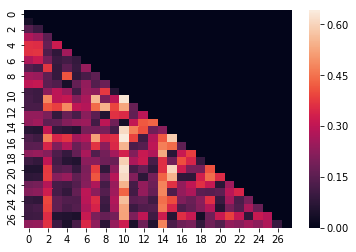

In [19]:
sns.heatmap(df_wpli_P1)

## read data again

In [21]:
dfs = list()
for i, con in enumerate(connecivity_methods):
    # only select rows with std 
    
    dfs.insert(i,pd.read_csv(con+".csv",sep="\t",index_col=0))

# Inspection of mean values

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


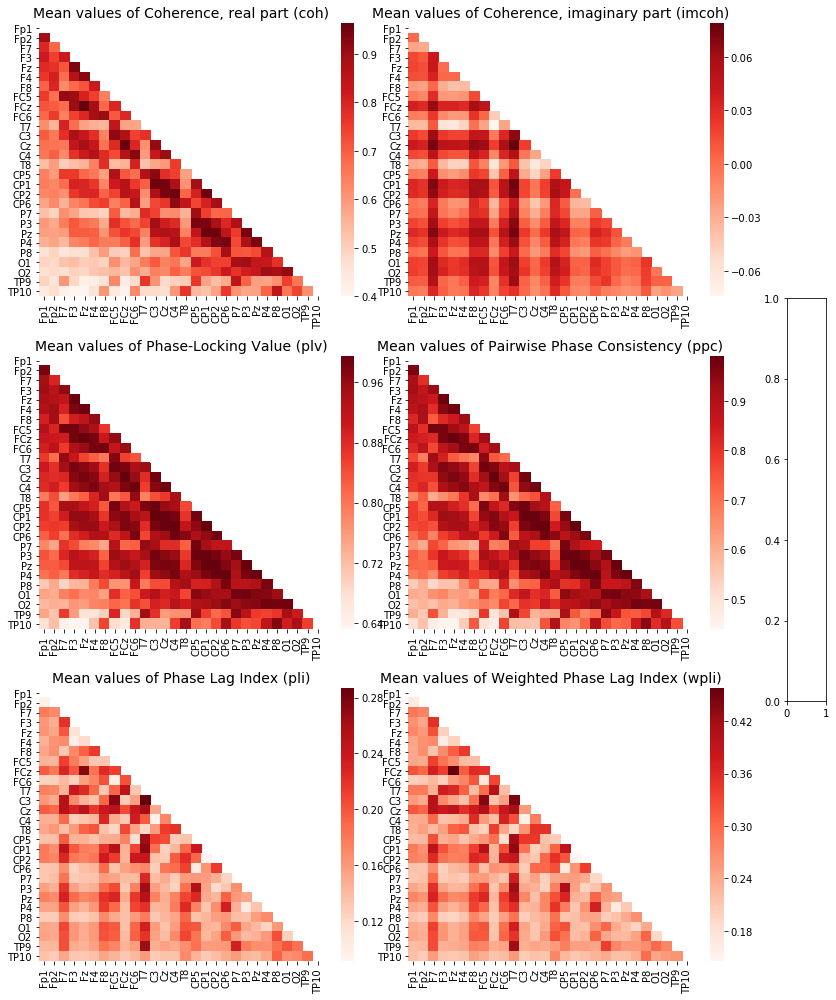

In [134]:

fig, axn = plt.subplots(3, 2, sharex=False, sharey=False,figsize=(18,14))


connecivity_methods_text =["Coherence, real part (coh)",
                      "Coherence, imaginary part (imcoh)",
                      "Phase-Locking Value (plv)",
                      "Pairwise Phase Consistency (ppc)",
                     "Phase Lag Index (pli)",
                     "Weighted Phase Lag Index (wpli)"                
                     ]
cbar_ax = fig.add_axes([.91, .3, .03, .4])


for i, ax in enumerate(axn.flat):
    coh_matr= dfs[i].mean().replace(0,np.nan).values.reshape((28,28))

    x = sns.heatmap(
        coh_matr, 
        ax=ax,
        
        yticklabels=ch_names,
        xticklabels=ch_names,
         #vmax =1,
    # vmin =0,      
           #cbar=i == 0,                
        #cbar_ax=None if i else cbar_ax   ,             
            
        
    cmap="Reds"
    )
    
    x.set_xticklabels(x.get_xticklabels(), rotation=90)
    ax.set_title("Mean values of "+connecivity_methods_text[i],size=14)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    
    
                   
fig.tight_layout(rect=[0.3, 0, .9, 1])

In [106]:
 coh_matr= dfs[0].mean().replace(0,np.nan).values.reshape((28,28))

In [113]:
plt.figure(figsize=(8,5))
sns.heatmap(coh_matr,vmin=0,vmax=1,cmap="Reds",
            xticklabels=ch_names,
           yticklabels=ch_names
           )

In [87]:
df_noduplicates.columns

Index(['Fp2_Fp1', 'F7_Fp1', 'F7_Fp2', 'F3_Fp1', 'F3_Fp2', 'F3_F7', 'Fz_Fp1',
       'Fz_Fp2', 'Fz_F7', 'Fz_F3',
       ...
       'TP10_CP2', 'TP10_CP6', 'TP10_P7', 'TP10_P3', 'TP10_Pz', 'TP10_P4',
       'TP10_P8', 'TP10_O1', 'TP10_O2', 'TP10_TP9'],
      dtype='object', length=378)

In [82]:
df_noduplicates = dfs[1].loc[:,dfs[1].std()!=0]

sns.heatmap(df_noduplicates,center=0,vmax=1,cmap="Reds")

# 2d correlations with targets

In [63]:
from sklearn.cluster import SpectralClustering, SpectralBiclustering

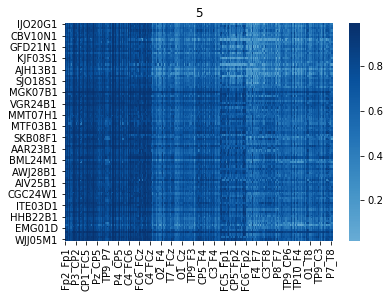

In [76]:
for ncl in range(5,10):
    model = SpectralBiclustering(n_clusters=(2,ncl)).fit(df_noduplicates)
    
    order_rows = np.argsort(model.row_labels_)
    order_cols = np.argsort(model.column_labels_ )
#     order = pd.DataFrame(
#                 data={"cluster":sc.labels_,"colname":df_noduplicates.columns}
#             ).sort_values(["cluster","colname"])
    plt.figure()
    plt.title(str(ncl))
    sns.heatmap(df_noduplicates.iloc[order_rows,order_cols],center=0,cmap="Blues")

## plots for all connectivity measures

In [17]:
labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")
labels.loc["BDS23B"] = labels.loc["BDS23S"]

In [18]:
def getJoinedDF(feats, labels):
    
    feats.index.name = "Subject_ID"

    list(feats.index)
    def correctNames(x):
        if x.endswith("1"):
            return x[:-1]
        else:
            return x

    feats.index = map(lambda x: correctNames(x) ,feats.index)



    feats = feats.sort_index()

    joinedDF = feats.join(labels, how="inner")
    return joinedDF

In [19]:
def getCorrs(joinedDf):
    corrs = joinedDf.corr().loc[:, ["ExplizitesLernen_kont","ImplizitesLernen_kont"]].drop(joinedDf.columns[-4:])
    return corrs

In [151]:
crit =  ['ExplizitesLernen_kont', 'ImplizitesLernen_kont']
f = plt.figure(figsize=(10,20))
for i in range(0,6):
    corrs = getCorrs(getJoinedDF(dfs[i],labels))
    for l_i in range(len(crit)):
        l = crit[l_i]
        corrmatrix= corrs[l].values.reshape([28,28])
        x = f.add_subplot(6,2,i*2+l_i+1)
        plt.title(connecivity_methods[i]+"_"+l)
        sns.heatmap(corrmatrix,vmin=-.4,vmax=.4,cmap="coolwarm_r")

I:\Miniconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
I:\Miniconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


nan nan
nan nan
nan nan
nan nan


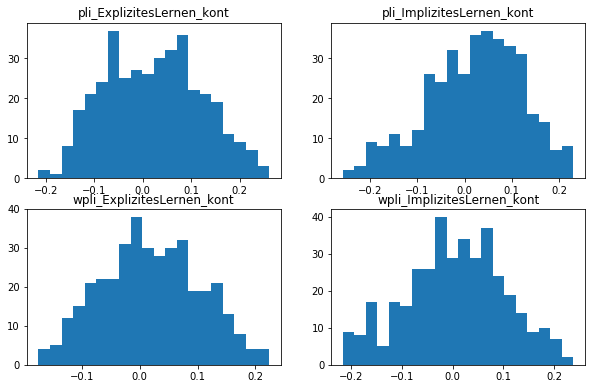

In [148]:
crit =  ['ExplizitesLernen_kont', 'ImplizitesLernen_kont']
f = plt.figure(figsize=(10,20))
for i in range(4,6):
    corrs = getCorrs(getJoinedDF(dfs[i],labels))
    for l_i in range(len(crit)):
        l = crit[l_i]
        corrs_= corrs[l].values
        x = f.add_subplot(6,2,i*2+l_i+1)
        plt.title(connecivity_methods[i]+"_"+l)

        plt.hist(corrs_,bins=20)
        print(np.min(corrs_),np.max(corrs_))

In [145]:
getCorrs(getJoinedDF(dfs[4],labels)).min()


ExplizitesLernen_kont   -0.214961
ImplizitesLernen_kont   -0.257727
dtype: float64

In [146]:
getCorrs(getJoinedDF(dfs[4],labels)).max()

ExplizitesLernen_kont    0.260303
ImplizitesLernen_kont    0.230409
dtype: float64

In [147]:
getCorrs(getJoinedDF(dfs[5],labels)).min()

ExplizitesLernen_kont   -0.175486
ImplizitesLernen_kont   -0.215822
dtype: float64

In [150]:
getCorrs(getJoinedDF(dfs[5],labels)).max()

ExplizitesLernen_kont    0.223855
ImplizitesLernen_kont    0.237543
dtype: float64

# dimensionality reduction for connectivity measures

In [29]:
from factor_analyzer import FactorAnalyzer
import scipy

# 1 screeplot
from sklearn.decomposition import PCA

In [30]:
# 6 * 2 figure, 

In [34]:
df_wpli = dfs[5]

In [35]:
df_wpli_labels = getJoinedDF(dfs[5],labels)

## PCA for no. of components

In [36]:
df_wpli.shape

(96, 784)

In [37]:
df_wpli = df_wpli.loc[:,df_wpli.std()!=0]

In [38]:
df_wpli.shape

(96, 378)

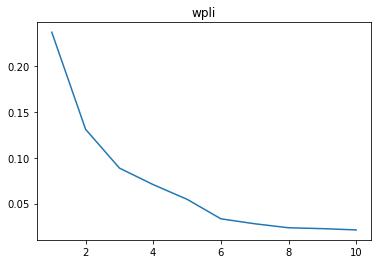

In [170]:
nc = 10
pca = PCA(nc,random_state=23).fit(df_wpli)
plt.figure()
plt.title(connecivity_methods[5])
plt.plot(range(1,nc+1),pca.explained_variance_ratio_)

__6 Komponenten__

## for mapping to components

In [39]:
fa_promax = FactorAnalyzer(6,rotation="promax").fit(df_wpli)

In [40]:
df_pcs = pd.DataFrame(
        data= fa_promax.transform(df_wpli),
            index=df_wpli.index,
        columns=["WPLI_PC_"+str(x) for x in [1,2,3,4,5,6]]
        )

In [43]:
sns.heatmap(df_pcs)

In [45]:
df_pcs.to_csv("wpli_latFact.csv",sep="\t")

In [318]:
x,y = np.tril_indices(28,-1)

In [319]:
def getCmap(i):
    hue_neg = 30
    hue_pos = 40+i*(280/6)
    hue_neg = 0
    cmap= sns.diverging_palette(hue_neg, hue_pos, 
                                s=95,l=70 ,as_cmap=True)
    return cmap

In [320]:
# HULS colours for factors:
HUSL = [40+i*(280/6) for i in range(6)]

rgb_list= []

for hs in HUSL:
    rgb_list += sns.husl_palette(1,hs/360,95/100,70/100)

### single heatmap

Text(0.5, 1.0, 'Strongest Loading Factors of WPLI connectivity measures')

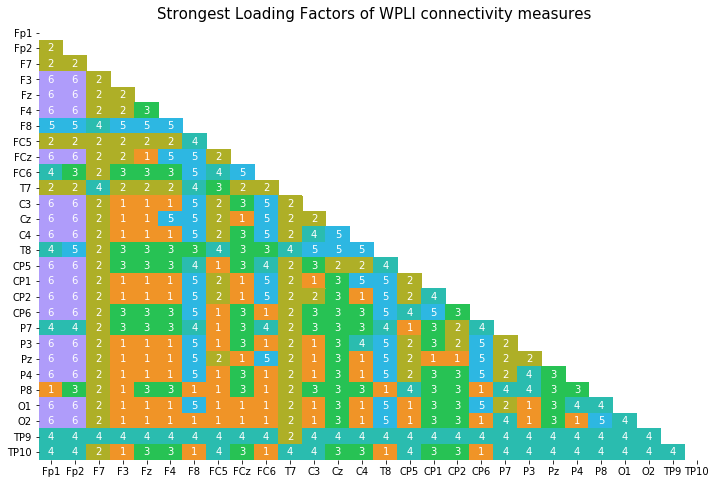

In [321]:
factor = np.full([28,28],np.nan)
maxFactor = np.argmax(np.abs(fa_promax.loadings_), axis=1).astype(float)
factor[x,y] = maxFactor
factor = pd.DataFrame(factor, columns=ch_names, index=ch_names)
factor = factor+1

plt.figure(figsize = (12,8))
sns.heatmap(
    #fa_promax.loadings_
    factor ,
    annot=True,
    yticklabels=True,
    xticklabels=True,
    cmap=rgb_list,
                cbar=False,                
            cbar_ax=None,
    ).set_ylabel('')
plt.title("Strongest Loading Factors of WPLI connectivity measures",size=15)

### factor wise loading heatmap

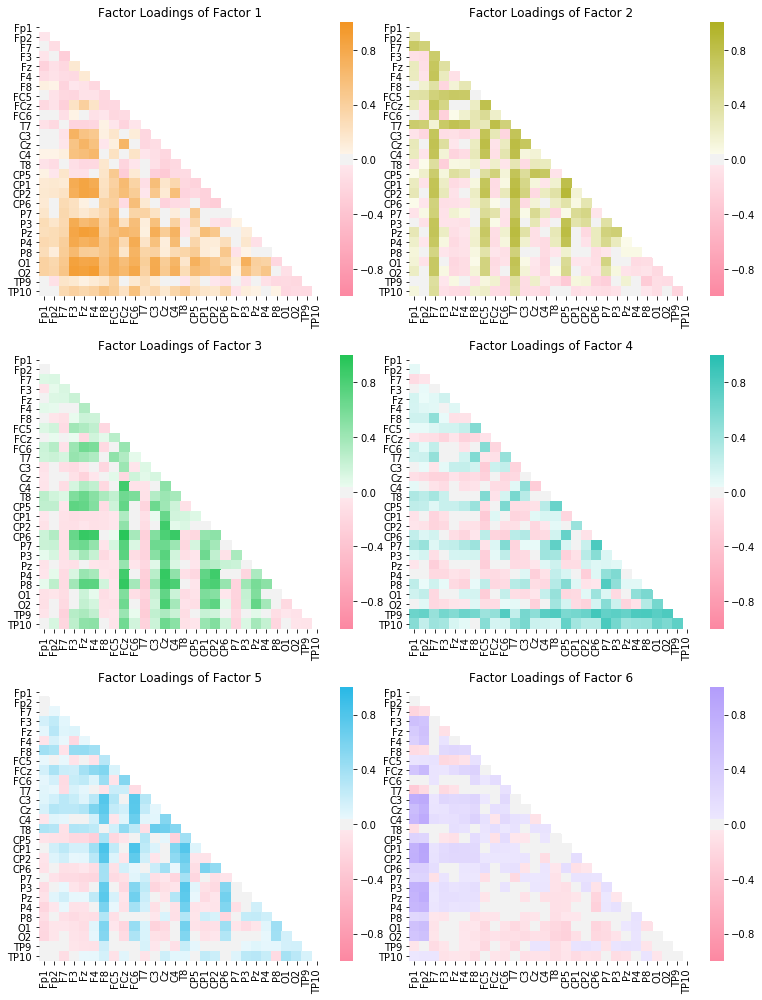

In [322]:

fig, axn = plt.subplots(3, 2, sharex=False, sharey=False,figsize=(18,14))


for i, ax in enumerate(axn.flat):
    factor = np.full([28,28],np.nan)
    factor[x,y] = fa_promax.loadings_[:,i]
    factor = pd.DataFrame(factor, columns=ch_names, index=ch_names)
    
    cmap = getCmap(i)
    
    sns.heatmap(
        factor, 
        ax=ax,
     yticklabels=True,
        xticklabels=True,
    vmax =1,
     vmin =-1,      
                        
        
    cmap=cmap,
        
         center=0
    )
    ax.set_title("Factor Loadings of Factor "+str(i+1))
    ax.set_ylabel('')    
    ax.set_xlabel('')
    
                   
fig.tight_layout(rect=[0.3, 0, .9, 1])

In [323]:
fa_promax.loadings_.shape

(378, 6)

In [324]:
df_pcs.corr()

WPLI_PC_1  WPLI_PC_2  WPLI_PC_3  WPLI_PC_4  WPLI_PC_5  WPLI_PC_6
WPLI_PC_1   1.000000  -0.373111  -0.220189   0.194955   0.363633  -0.140889
WPLI_PC_2  -0.373111   1.000000   0.426242  -0.241391  -0.032068   0.329437
WPLI_PC_3  -0.220189   0.426242   1.000000  -0.220563   0.067386   0.302302
WPLI_PC_4   0.194955  -0.241391  -0.220563   1.000000   0.211391  -0.024212
WPLI_PC_5   0.363633  -0.032068   0.067386   0.211391   1.000000  -0.106501
WPLI_PC_6  -0.140889   0.329437   0.302302  -0.024212  -0.106501   1.000000

# correlation with Labels

## Correlations with individual connectivity measure

In [7]:
dfs =[0,0,0,0,0,0]

In [20]:
dfs[5]=pd.read_csv("wpli.csv",sep="\t", index_col=0)

In [21]:
dfs[5]

Fp1_Fp1  Fp1_Fp2  Fp1_F7  Fp1_F3  Fp1_Fz  Fp1_F4  Fp1_F8  Fp1_FC5  \
AAR23B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
ACE11B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
ADD25P1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AGI16S       0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AHR27N1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AIV25B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AJH13B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AJL30S1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AKK31B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
ARL17K1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
ARO12C       0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
ATO21W1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AVR16F1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
AWJ28B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BAM16A1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BDR13B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BDS23B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BGI23S1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BHC19K1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BMI31E1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BML24M1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BMR01N1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BRH18F1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BRL04L1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BRS27B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BSE11B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
BWR08M1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
CAB19N1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
CBV10N1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
CFF19P1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
...          ...      ...     ...     ...     ...     ...     ...      ...   
MFB01B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MGK07B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MHU07N1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MLS07B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MMN14M1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MMT07H1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MNI23B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MSJ07H1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MTC06B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MTF03B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MUH04O1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
MWA27N1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
NVM07B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
RAD19B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SBL15H       0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SHT02N1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SJA02B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SJN01B1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SJO18S1      0.0      0.0     0.0     0.0     0.0     0.0     0.0      0.0   
SKB08F1      0.0      0.0     0

In [22]:
df_wpli_lab = getJoinedDF(dfs[5],labels)

In [23]:
df_wpli_lab["ImplizitesLernen_kont"] = 0-df_wpli_lab["ImplizitesLernen_kont"] 

In [24]:
corrs = getCorrs(df_wpli_lab)

In [25]:
corrs.columns = ["Explicit Knowledge","Implicit Knowledge"]

In [28]:
corrs_impl = pd.DataFrame(corrs["Implicit Knowledge"].values.reshape([28,28]),columns=ch_names,index=ch_names)
corrs_expl = pd.DataFrame(corrs["Explicit Knowledge"].values.reshape([28,28]),columns=ch_names,index=ch_names)

In [256]:
dfs_ = [corrs_impl,corrs_expl]

fig, axn = plt.subplots(1, 2, sharey=False,figsize=(20,7))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    x = sns.heatmap(dfs_[i], ax=ax,
                    yticklabels=True,
                            center=0,vmin=-.3,vmax=.3,                              
                    
                cbar=i == 0,                
                cbar_ax=None if i else cbar_ax)
    ax.vlines([50], *ax.get_xlim(),colors='white')

cols = ["Implicit Knowledge","Explicit Knowledge"]


for ax, col in zip(axn, cols):
    ax.set_title(col,size=20)


fig.tight_layout(rect=[0.3, 0, .9, 1])


I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


get correlations that are bigger than |0.202| (p05 threshold)

In [31]:
mask1 = np.abs(dfs[5])>0.20


In [36]:
dfs_ = [corrs_impl,corrs_expl]

fig, axn = plt.subplots(1, 2, sharey=False,figsize=(20,7))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    mask = np.abs(dfs_[i])<0.20
    x = sns.heatmap(dfs_[i], ax=ax,
                    yticklabels=True,
                            center=0,vmin=-.3,vmax=.3,                              
                    mask=mask,
                    
                cbar=i == 0,                
                cbar_ax=None if i else cbar_ax)
    ax.vlines([50], *ax.get_xlim(),colors='white')

cols = ["Implicit Knowledge","Explicit Knowledge"]


for ax, col in zip(axn, cols):
    ax.set_title(col,size=20)


fig.tight_layout(rect=[0.3, 0, .9, 1])


/Users/mh250093/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


## Correlations with latent factors

In [325]:
df_pcs = pd.DataFrame(
        data= fa_promax.transform(df_wpli),
            index=df_wpli.index,
        columns=["WPLI_PC_"+str(x) for x in [1,2,3,4,5,6]]
        )

df_joined_pcs = df_wpli_lab[["ImplizitesLernen_kont","ExplizitesLernen_kont"]]
df_joined_pcs.columns =[ "Implicit Knowledge","Explicit Knowledge" ]
df_joined_pcs["Implicit Knowledge"] = 0- df_joined_pcs["Implicit Knowledge"]

df_joined_pcs = df_joined_pcs.join(df_pcs)

I:\Miniconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


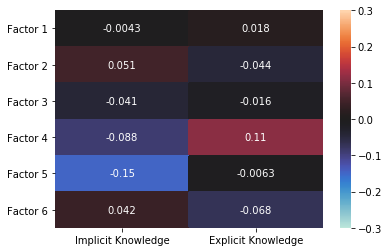

In [327]:

corrdf = df_joined_pcs.corr().loc[:,[ "Implicit Knowledge","Explicit Knowledge" ]].filter(like="WPLI_PC_",axis=0)
corrdf.index = ['Factor '+str(x) for x in [1,2,3,4,5,6]]
plt.figure()
sns.heatmap(corrdf,vmin=-0.3,center=0,vmax=.3,annot=True)